### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Importing and Understanding Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

In [9]:
car_dataset = pd.read_csv("F:\\UpGrad\\Machine Learning - I\\Linear Regression\\Assignment\\CarPrice_Assignment.csv")

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car_dataset.shape

(205, 26)

In [12]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [13]:
car_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
#car_dataset["Company"] = car_dataset["CarName"].str.split(" ", 1).str[0]

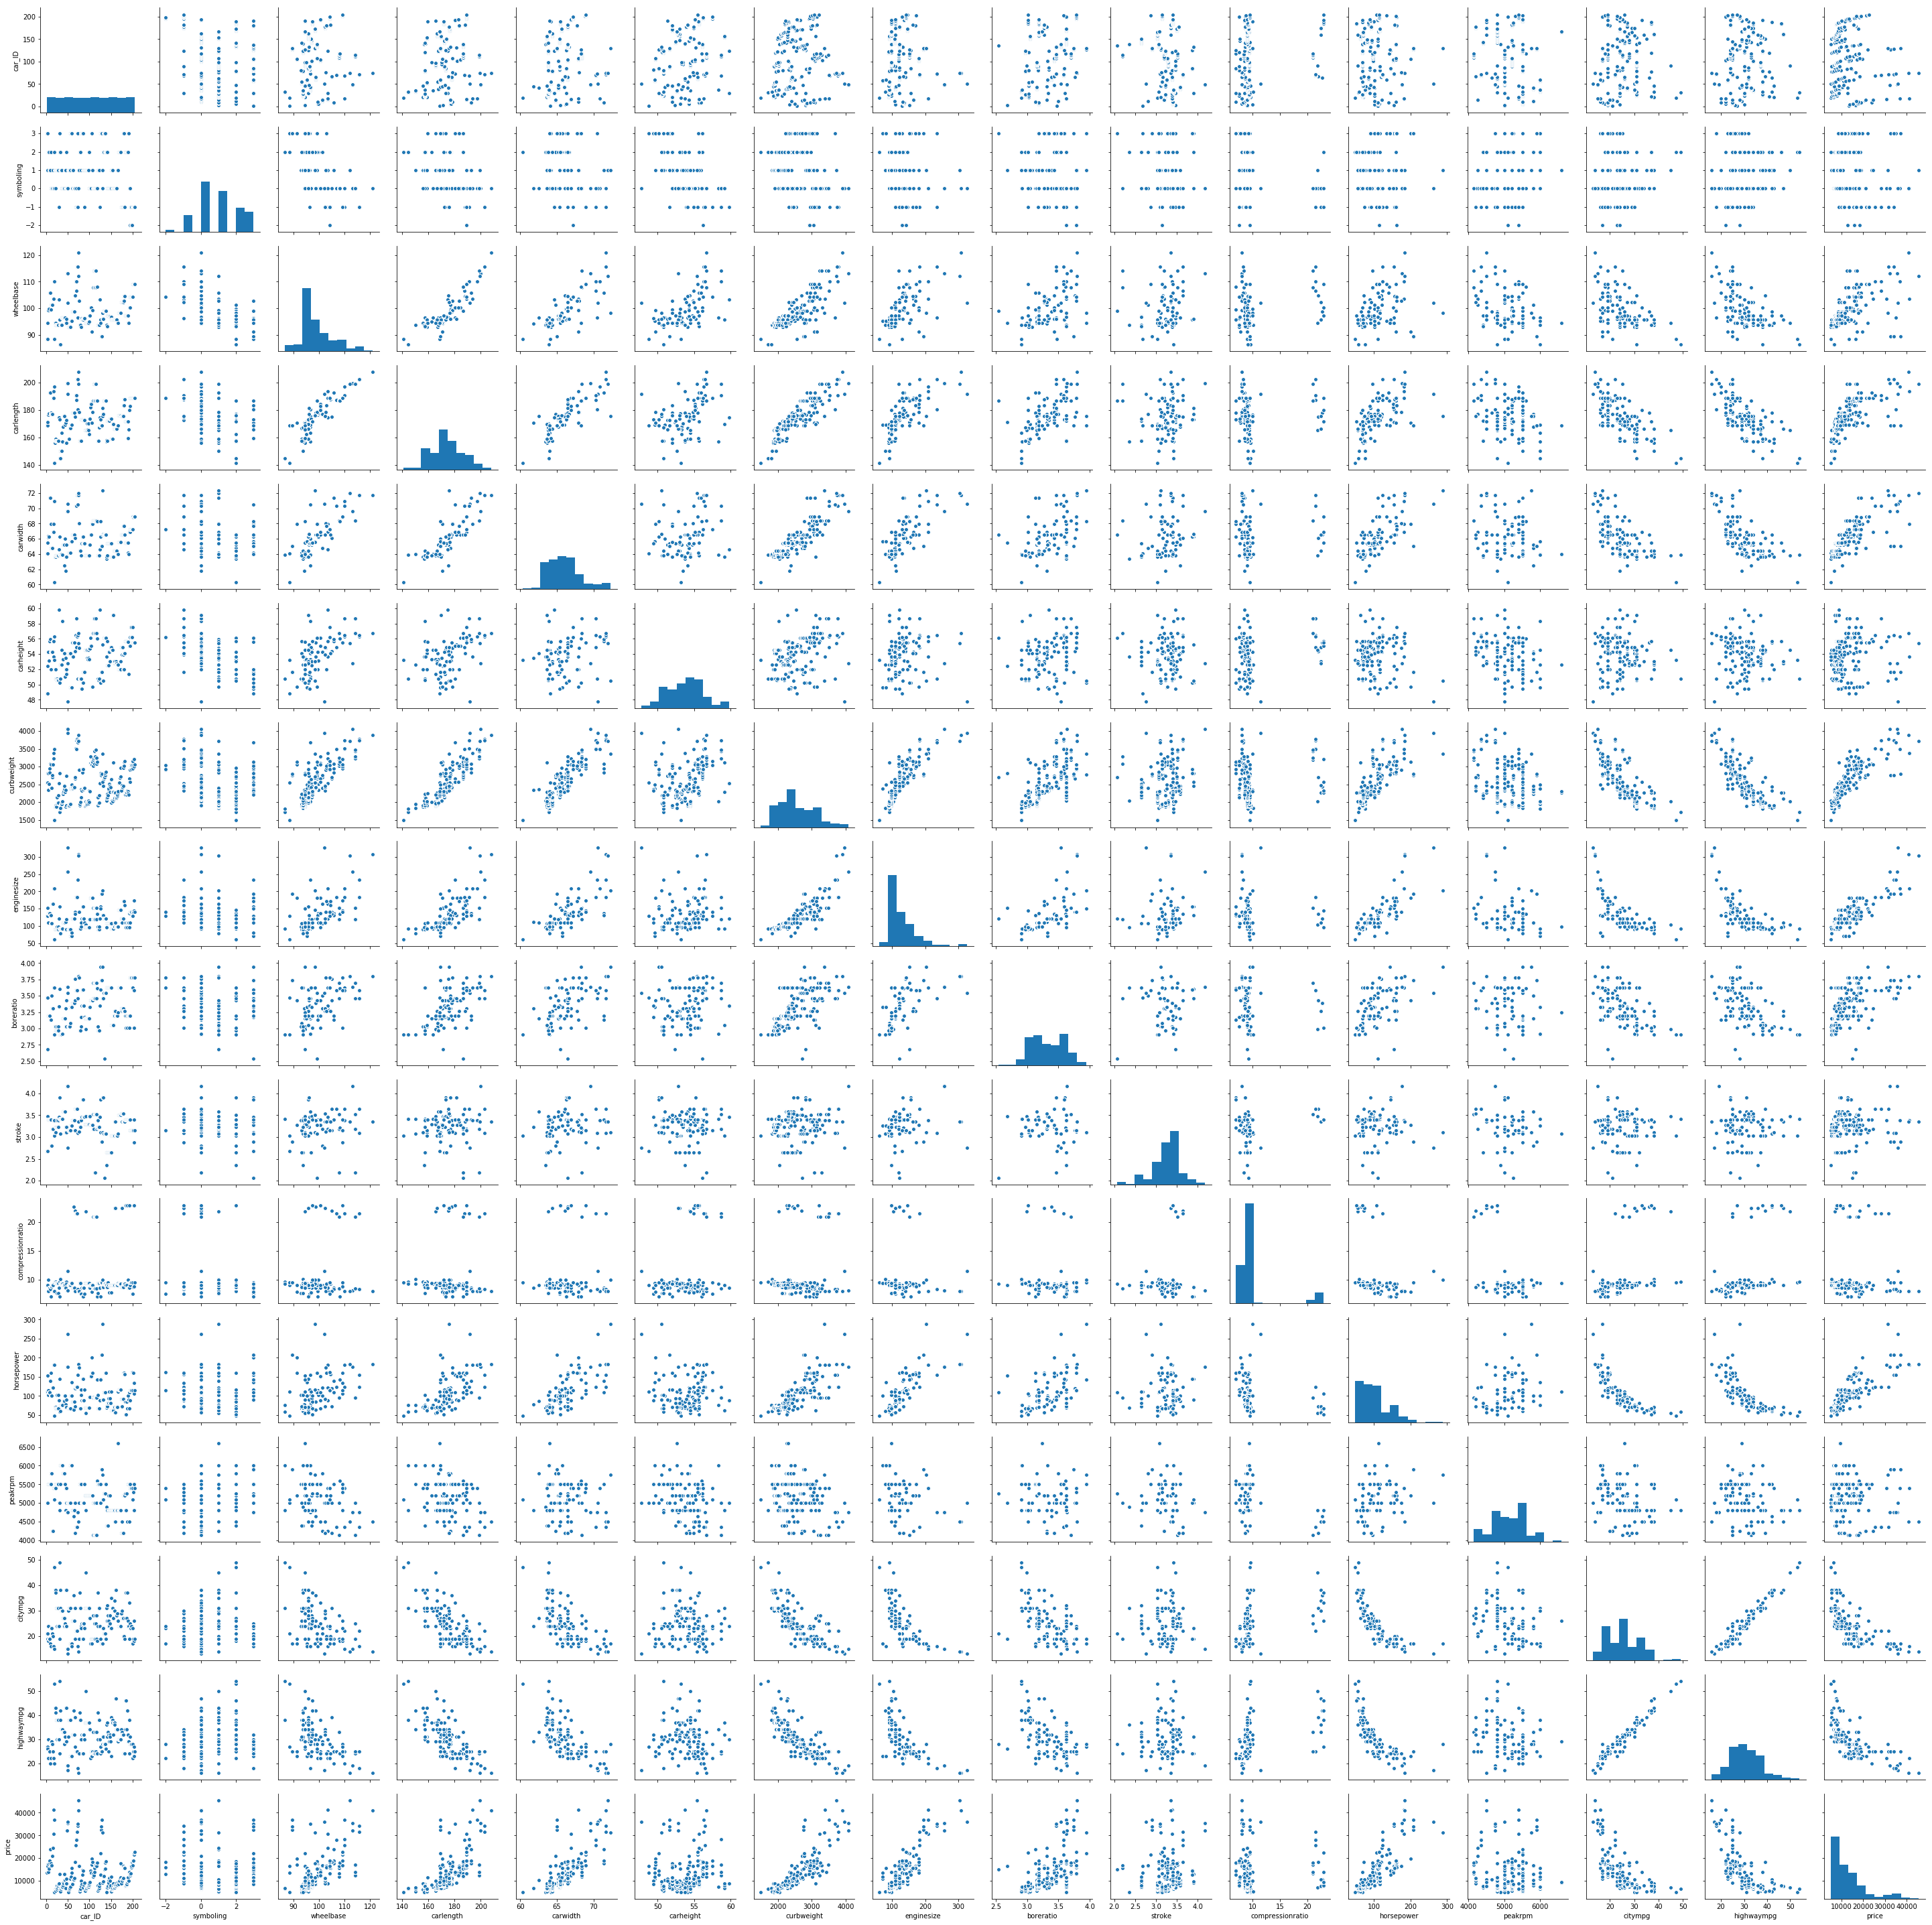

In [15]:
sns.pairplot(car_dataset)
plt.figure(figsize = (50,25))
plt.show()

## Data Preparation

In [16]:
car_dataset["Company"] = car_dataset["CarName"].str.split(" ", 1).str[0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
varlist = ["fueltype", "aspiration", "doornumber", "enginelocation"]

def binary_map(x):
#    return x.map({'gas':0, 'diesel':1}, {'std':0, 'turbo':1}, {'two':0, 'four':1}, {'front':0, 'rear':1})
    return x.map({'gas':0, 'diesel':1, 'std':0, 'turbo':1, 'two':0, 'four':1, 'front':0, 'rear':1})

car_dataset[varlist] = car_dataset[varlist].apply(binary_map)

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,6,2,audi fox,0,0,0,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,0,0,1,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,0,0,1,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,0,1,1,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),0,1,0,hatchback,4wd,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


In [19]:
car_dataset.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
len((car_dataset.Company.unique()))

28

In [21]:
car_dataset.replace(["maxda", "Nissan", "porcshce", "toyouta", "vokswagen", "vw"], ["mazda", "nissan", "porsche", "toyota", "volkswagen", "volkswagen"], inplace = True)

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,6,2,audi fox,0,0,0,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,0,0,1,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,0,0,1,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,0,1,1,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),0,1,0,hatchback,4wd,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


In [23]:
car_dataset.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [24]:
len((car_dataset.Company.unique()))

22

In [25]:
car_dataset.drop(["CarName"], axis = 1, inplace = True)

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,5,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,6,2,0,0,0,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,7,1,0,0,1,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,8,1,0,0,1,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,9,1,0,1,1,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,10,0,0,1,0,hatchback,4wd,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


## Creating Dummies

In [27]:
carbody_d = pd.get_dummies(car_dataset["carbody"])
print(carbody_d.head())

drivewheel_d = pd.get_dummies(car_dataset["drivewheel"])
print(drivewheel_d.head())

enginetype_d = pd.get_dummies(car_dataset["enginetype"])
print(enginetype_d.head())

fuelsystem_d = pd.get_dummies(car_dataset["fuelsystem"])
print(fuelsystem_d.head())

company_d = pd.get_dummies(car_dataset["Company"])
print(company_d.head())

   convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0
   4wd  fwd  rwd
0    0    0    1
1    0    0    1
2    0    0    1
3    0    1    0
4    1    0    0
   dohc  dohcv  l  ohc  ohcf  ohcv  rotor
0     1      0  0    0     0     0      0
1     1      0  0    0     0     0      0
2     0      0  0    0     0     1      0
3     0      0  0    1     0     0      0
4     0      0  0    1     0     0      0
   1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0     0    0    0     1     0     0
1     0     0     0    0    0     1     0     0
2     0     0     0    0    0     1     0     0
3     0     0     0    0    0     1     0     0
4     0     0     0    0    0     1     0     0
   alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu

In [28]:
car_dataset = pd.concat([car_dataset, carbody_d, drivewheel_d, enginetype_d, fuelsystem_d, company_d], axis = 1)

In [29]:
car_dataset.replace(["two", "three", "four", "five", "six", "eight", "twelve"], [2, 3, 4, 5, 6, 8, 12], inplace = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,2,0,0,0,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,1,0,0,1,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,1,0,0,1,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1,0,1,1,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,0,0,1,0,hatchback,4wd,0,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
car_dataset.drop(["car_ID", "Company", "carbody", "drivewheel", "enginetype", "fuelsystem"], axis = 1, inplace = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(car_dataset)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,13495.000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.680,9.00,111,5000,21,27,16500.000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.470,9.00,154,5000,19,26,16500.000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.400,10.00,102,5500,24,30,13950.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.400,8.00,115,5500,18,22,17450.000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.400,8.50,110,5500,19,25,15250.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.400,8.50,110,5500,19,25,17710.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.400,8.50,110,5500,19,25,18920.000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,1,1,0,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.400,8.30,140,5500,17,20,23875.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.400,7.00,160,5500,16,22,17859.167,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling Features
We will use MinMax scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
num_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "cylindernumber", "enginesize",
           "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,0,1


In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_train)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.150000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.156250,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.125000,0.262500,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.031250,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
190,1.0,0,0,0,0,0.272414,0.400000,0.308333,0.318584,0.284329,0.2,0.181132,0.404762,0.611111,0.093750,0.175000,0.551020,0.305556,0.324324,0.134321,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,0.6,0,0,1,0,0.272414,0.393496,0.291667,0.592920,0.187355,0.2,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.065779,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
177,0.2,0,0,1,0,0.544828,0.560976,0.516667,0.539823,0.376261,0.2,0.230189,0.500000,0.681818,0.106250,0.183333,0.020408,0.388889,0.405405,0.169351,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
181,0.2,0,0,1,0,0.617241,0.759350,0.516667,0.557522,0.645074,0.4,0.377358,0.468254,0.585859,0.137500,0.450000,0.428571,0.166667,0.189189,0.293726,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,0.6,0,0,1,0,0.272414,0.473171,0.291667,0.504425,0.212956,0.2,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.079592,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

### RFE
#### Recursive feature elimination

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('fueltype', True, 1),
 ('aspiration', False, 42),
 ('doornumber', False, 45),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 40),
 ('peakrpm', True, 1),
 ('citympg', False, 43),
 ('highwaympg', False, 41),
 ('convertible', False, 2),
 ('hardtop', False, 27),
 ('hatchback', False, 20),
 ('sedan', False, 29),
 ('wagon', False, 24),
 ('4wd', False, 35),
 ('fwd', False, 26),
 ('rwd', False, 30),
 ('dohc', True, 1),
 ('dohcv', False, 25),
 ('l', False, 18),
 ('ohc', True, 1),
 ('ohcf', False, 17),
 ('ohcv', True, 1),
 ('rotor', False, 21),
 ('1bbl', False, 5),
 ('2bbl', False, 7),
 ('4bbl', False, 3),
 ('idi', True, 1),
 ('mfi', False, 38),
 ('mpfi', False, 6),
 ('spdi', False, 4),
 ('spfi', Fal

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'dohc', 'ohc', 'ohcv', 'idi', 'bmw',
       'buick', 'jaguar', 'peugeot', 'porsche', 'subaru'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'citympg', 'highwaympg', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'dohcv',
       'l', 'ohcf', 'rotor', '1bbl', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi',
       'spfi', 'alfa-romero', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault',
       'saab', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.09e-68
Time:                        16:34:18   Log-Likelihood:                 226.19
No. Observations:                 143   AIC:                            -412.4
Df Residuals:                     123   BIC:                            -353.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2205      0.072  

In [45]:
X_train_vif = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
13,idi,inf
5,enginesize,144.010000
8,compressionratio,89.150000
4,cylindernumber,80.730000
3,curbweight,53.960000
2,carwidth,48.260000
6,boreratio,46.390000
7,stroke,25.430000
11,ohc,20.660000


In [46]:
X_train_2 = X_train_rfe.drop(["idi"], axis = 1)

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_2)

In [48]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.09e-68
Time:                        16:38:15   Log-Likelihood:                 226.19
No. Observations:                 143   AIC:                            -412.4
Df Residuals:                     123   BIC:                            -353.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2205      0.072  

In [51]:
X_train_vif = X_train_2.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginesize,144.01
8,compressionratio,89.15
4,cylindernumber,80.73
0,fueltype,68.20
3,curbweight,53.96
2,carwidth,48.26
6,boreratio,46.39
7,stroke,25.43
11,ohc,20.66
9,peakrpm,10.06


In [53]:
X_train_3 = X_train_2.drop(["jaguar"], axis = 1)

In [54]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_3)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           4.29e-69
Time:                        16:47:10   Log-Likelihood:                 224.47
No. Observations:                 143   AIC:                            -410.9
Df Residuals:                     124   BIC:                            -354.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2535      0.070  

In [55]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           4.29e-69
Time:                        16:47:29   Log-Likelihood:                 224.47
No. Observations:                 143   AIC:                            -410.9
Df Residuals:                     124   BIC:                            -354.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2535      0.070  

In [57]:
X_train_vif = X_train_3.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginesize,82.28
8,compressionratio,75.08
4,cylindernumber,70.82
0,fueltype,57.48
3,curbweight,53.79
2,carwidth,45.47
6,boreratio,37.33
7,stroke,25.16
11,ohc,20.44
9,peakrpm,9.79


In [58]:
X_train_4 = X_train_3.drop(["compressionratio"], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_4)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.31e-69
Time:                        16:48:07   Log-Likelihood:                 222.37
No. Observations:                 143   AIC:                            -408.7
Df Residuals:                     125   BIC:                            -355.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1902      0.063      3.

In [61]:
X_train_vif = X_train_4.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginesize,66.69
3,curbweight,51.98
4,cylindernumber,48.02
2,carwidth,45.36
6,boreratio,28.17
7,stroke,24.77
10,ohc,20.25
8,peakrpm,9.65
11,ohcv,4.86
16,subaru,4.58


In [62]:
X_train_5 = X_train_4.drop(["enginelocation"], axis = 1)

In [63]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_5)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.15e-69
Time:                        16:48:51   Log-Likelihood:                 220.36
No. Observations:                 143   AIC:                            -406.7
Df Residuals:                     126   BIC:                            -356.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2291      0.060      3.

In [64]:
X_train_vif = X_train_5.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,64.89
2,curbweight,51.85
3,cylindernumber,48.02
1,carwidth,41.32
5,boreratio,28.17
6,stroke,24.76
9,ohc,20.16
7,peakrpm,9.12
10,ohcv,4.77
15,subaru,4.58


In [67]:
X_train_6 = X_train_5.drop(["curbweight"], axis = 1)

In [68]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_6)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           6.04e-68
Time:                        16:49:33   Log-Likelihood:                 213.06
No. Observations:                 143   AIC:                            -394.1
Df Residuals:                     127   BIC:                            -346.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2795      0.061      4.

In [69]:
X_train_vif = X_train_6.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,54.04
2,cylindernumber,47.33
1,carwidth,27.48
4,boreratio,27.34
5,stroke,24.73
8,ohc,20.11
6,peakrpm,9.07
9,ohcv,4.76
14,subaru,4.55
7,dohc,3.41


In [78]:
X_train_7 = X_train_6.drop(["enginesize"], axis = 1)

In [79]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_7)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     69.52
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           9.54e-53
Time:                        17:00:13   Log-Likelihood:                 170.83
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     128   BIC:                            -267.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1550      0.058     -2.

In [82]:
X_train_vif = X_train_7.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,26.63
4,stroke,21.03
2,cylindernumber,19.48
3,boreratio,18.10
7,ohc,14.90
5,peakrpm,6.14
8,ohcv,4.70
6,dohc,3.39
13,subaru,3.23
11,peugeot,2.51


In [83]:
X_train_8 = X_train_7.drop(["stroke"], axis = 1)

In [84]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_8)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     75.23
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.27e-53
Time:                        17:01:37   Log-Likelihood:                 170.65
No. Observations:                 143   AIC:                            -313.3
Df Residuals:                     129   BIC:                            -271.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1398      0.051     -2.

In [85]:
X_train_9 = X_train_8.drop(["dohc"], axis = 1)

In [86]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_9)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     81.31
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.43e-54
Time:                        17:01:55   Log-Likelihood:                 170.01
No. Observations:                 143   AIC:                            -314.0
Df Residuals:                     130   BIC:                            -275.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1613      0.047     -3.

In [87]:
X_train_10 = X_train_9.drop(["peakrpm"], axis = 1)

In [88]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_10)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     87.90
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           6.53e-55
Time:                        17:02:10   Log-Likelihood:                 168.95
No. Observations:                 143   AIC:                            -313.9
Df Residuals:                     131   BIC:                            -278.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1166      0.035     -3.

In [89]:
X_train_11 = X_train_10.drop(["fueltype"], axis = 1)

In [90]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_11)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     95.89
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.60e-55
Time:                        17:02:29   Log-Likelihood:                 167.95
No. Observations:                 143   AIC:                            -313.9
Df Residuals:                     132   BIC:                            -281.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1208      0.035     -3.

In [91]:
X_train_vif = X_train_11.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.66
2,boreratio,14.76
1,cylindernumber,12.32
3,ohc,4.01
4,ohcv,2.35
9,subaru,1.95
7,peugeot,1.65
8,porsche,1.33
6,buick,1.30
5,bmw,1.19


In [92]:
X_train_12 = X_train_11.drop(["carwidth"], axis = 1)

In [93]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_12)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     66.62
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           6.13e-45
Time:                        17:03:30   Log-Likelihood:                 138.95
No. Observations:                 143   AIC:                            -257.9
Df Residuals:                     133   BIC:                            -228.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0967      0.042     -2.

In [94]:
X_train_vif = X_train_12.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,8.24
1,boreratio,7.65
2,ohc,3.96
3,ohcv,2.33
8,subaru,1.79
6,peugeot,1.55
7,porsche,1.30
4,bmw,1.16
5,buick,1.16


In [95]:
X_train_13 = X_train_12.drop(["porsche"], axis = 1)

In [97]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_13)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     74.74
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.19e-45
Time:                        17:04:03   Log-Likelihood:                 138.34
No. Observations:                 143   AIC:                            -258.7
Df Residuals:                     134   BIC:                            -232.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1068      0.041     -2.

In [98]:
X_train_vif = X_train_13.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,8.02
1,boreratio,7.04
2,ohc,3.42
3,ohcv,2.17
7,subaru,1.63
6,peugeot,1.44
5,buick,1.15
4,bmw,1.14


In [99]:
X_train_14 = X_train_13.drop(["cylindernumber"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_14)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     45.35
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.77e-32
Time:                        17:04:26   Log-Likelihood:                 103.42
No. Observations:                 143   AIC:                            -190.8
Df Residuals:                     135   BIC:                            -167.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0759      0.046      1.661      0.0

In [100]:
X_train_15 = X_train_14.drop(["ohcv"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_15)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     52.42
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           5.05e-33
Time:                        17:04:36   Log-Likelihood:                 102.59
No. Observations:                 143   AIC:                            -191.2
Df Residuals:                     136   BIC:                            -170.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.041      2.431      0.0

In [101]:
X_train_vif = X_train_15.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,3.52
1,ohc,2.46
5,subaru,1.52
4,peugeot,1.36
3,buick,1.10
2,bmw,1.09


# Residual Analysis of the train data

In [102]:
y_train_price = lm.predict(X_train_15)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

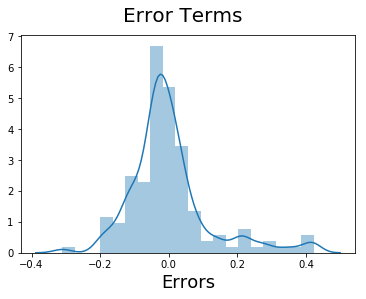

In [104]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Making Predictions

In [105]:
num_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "cylindernumber", "enginesize",
           "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [106]:
y_test = df_test.pop('price')
X_test = df_test

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_15 = X_train_15.drop(['const'], axis=1)
X_test_new = X_test[X_train_15.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [109]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

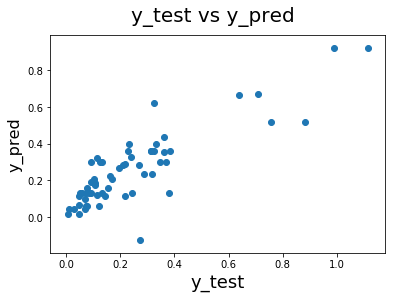

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# R-squared score on the test set

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.72818374261089236